In [ ]:
week2assignment

In [ ]:
## An introduction of research question.
# How is the wildfire planning effectiveness among 58 California counties? Does Social Vulnerablity score in each counity impact the ildfire planning effectiveness?

In [ ]:
## Why it is imporant.
# The study provides insights into the effectiveness and shortcomings of current wildfire resilience measures in California's counties. It also provides implications for planning guidelines and policy-making, aiming to strengthen future wildfire resilience strategies.

In [ ]:
## Spatial Scope.
# California, USA
# The area is important beacause wildfires, exacerbated by climate change, are a growing planning and policy challenge worldwide, particularly in California.

In [8]:
!pip install pandas

In [10]:
!pip install geopandas

In [9]:
#import python libraries
import pandas as pd
import geopandas as gpd 

In [27]:
# Read data 1 to notebook & preview data
df_PE = pd.read_csv('PE_58CAcounties.csv')
df_PE.head()

,Unnamed: 0,01_ALAMEDA,02_ALPINE,03_AMADOR,04_BUTTE,05_CALAVERAS,06_COLUSA,07_CONTRA COSTA,08_DEL NORTE,09_EL DORADO,...,49_SONOMA,50_STANISLAUS,51_SUTTER,52_TEHAMA,53_TRINITY,54_TULARE,55_TUOLUMNE,56_VENTURA,57_YOLO,58_YOBA
0,GP TOTAL,38.50,34.50,40.00,47.50,43.50,42.00,40.00,24.00,37.50,...,29.00,25.50,22.50,35.50,40.00,42.50,40.00,45.50,39.00,36.50
1,CWPP TOTAL,49.05,52.38,37.05,34.73,55.05,54.63,45.47,50.71,48.30,...,58.21,0.00,0.00,32.23,33.32,30.56,33.24,34.73,36.73,49.46
2,HMP TOTAL,48.98,46.98,58.98,55.98,52.98,59.98,59.98,57.98,47.98,...,44.98,59.98,56.98,55.98,44.98,53.98,44.98,58.98,51.98,58.98
3,3 PLANS TOTAL-PROPORTIONATE,0.73,0.72,0.73,0.74,0.81,0.84,0.78,0.71,0.72,...,0.71,0.46,0.43,0.67,0.64,0.68,0.64,0.75,0.69,0.78


In [28]:
# Read data 2 to notebook & preview data
df_SVI = pd.read_csv('svi_interactive_map-highlighted.csv')
df_SVI.head()

,GEO LEVEL,GEO COMPARISON,YEAR,GEO UNIT,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,...,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
0,County,state,2020,county,6,California,CA,6001,Alameda County,6001,...,31.0,0.1,0.3,0.1,0.8,0.1,4.6,0.2,0.4,0.1
1,County,state,2020,county,6,California,CA,6003,Alpine County,6003,...,0.5,0.8,28.7,4.2,0.0,3.4,2.8,2.1,0.0,3.4
2,County,state,2020,county,6,California,CA,6005,Amador County,6005,...,0.9,0.3,0.5,0.2,0.1,0.1,4.5,0.6,0.6,0.6
3,County,state,2020,county,6,California,CA,6007,Butte County,6007,...,4.6,0.2,0.8,0.1,0.2,0.1,4.5,0.4,0.1,0.1
4,County,state,2020,county,6,California,CA,6009,Calaveras County,6009,...,1.9,0.3,0.6,0.3,0.0,0.1,3.7,0.6,0.1,0.1


<Axes: >

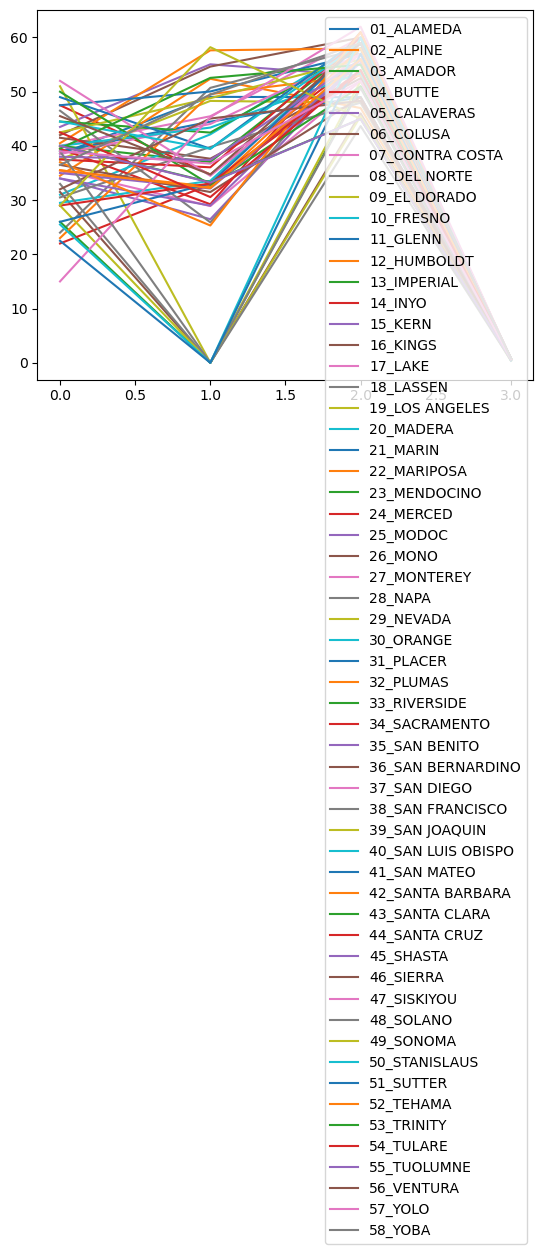

In [22]:
# Plot the data1
df_PE.plot()

In [33]:
# Select rows in df_PE
df_PE_TRIMED = df_PE.iloc[0:3, 0:59]

<Axes: >

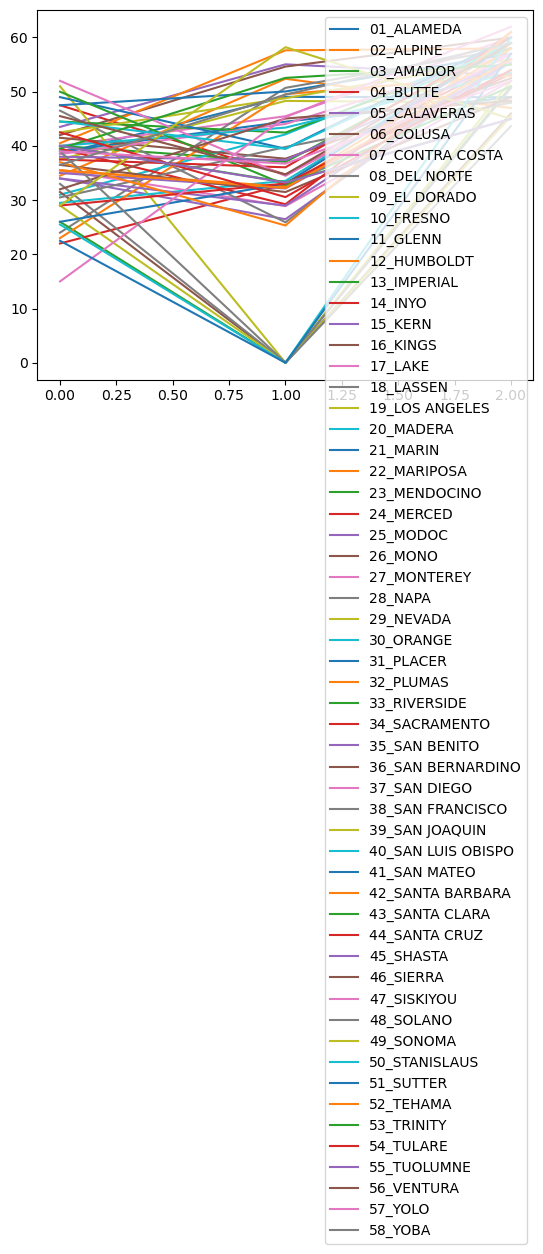

In [44]:
# Plot the data1 again
df_PE_TRIMED.plot()

<Axes: >

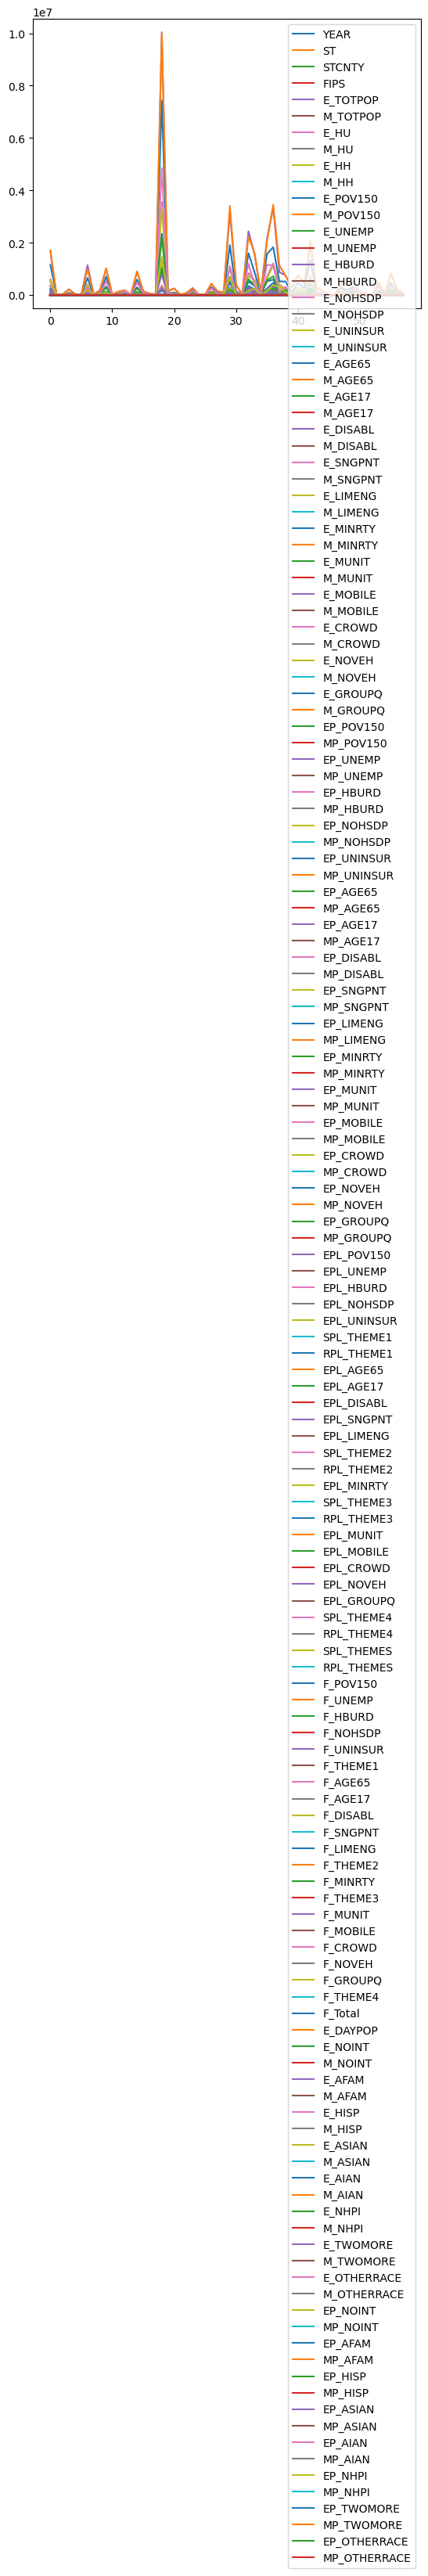

In [29]:
# Plot the data2
df_SVI.plot()

In [71]:
# Select collums about social vulnerability score sums in themes in df_SVI
df_SVI_TRIMED = df_SVI.loc[0:59, ['COUNTY', 'RPL_THEME1', 'RPL_THEME2', 'RPL_THEME3', 'RPL_THEME4', 'RPL_THEMES']]

<Axes: >

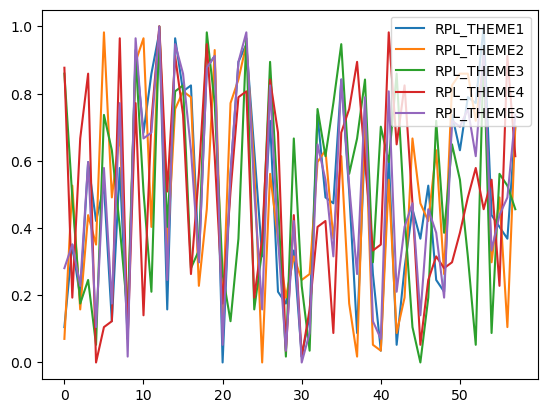

In [72]:
# Plot the data2 again
df_SVI_TRIMED.plot()

In [73]:
# Transpose data2 as needed
TRANSPOSED_df_SVI_TRIMED = df_SVI_TRIMED.T
TRANSPOSED_df_SVI_TRIMED.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
COUNTY,Alameda County,Alpine County,Amador County,Butte County,Calaveras County,Colusa County,Contra Costa County,Del Norte County,El Dorado County,Fresno County,...,Sonoma County,Stanislaus County,Sutter County,Tehama County,Trinity County,Tulare County,Tuolumne County,Ventura County,Yolo County,Yuba County
RPL_THEME1,0.1053,0.3509,0.193,0.5965,0.4211,0.5263,0.1228,0.5789,0.0702,0.9298,...,0.2105,0.7368,0.6316,0.7895,0.7719,1.0,0.4386,0.4035,0.3684,0.7018
RPL_THEME2,0.0702,0.5263,0.1579,0.4386,0.3509,0.9825,0.4912,0.6842,0.1228,0.8947,...,0.2632,0.8246,0.8596,0.8596,0.7193,0.8947,0.2982,0.4912,0.1053,0.7018
RPL_THEME3,0.8596,0.4912,0.1754,0.2456,0.0526,0.7368,0.6316,0.4035,0.1404,0.9123,...,0.386,0.6491,0.5439,0.3158,0.0526,0.9298,0.0877,0.5614,0.5263,0.4561
RPL_THEME4,0.8772,0.193,0.6667,0.8596,0.0,0.1053,0.1228,0.9649,0.0702,0.7719,...,0.2807,0.2982,0.386,0.4912,0.5789,0.4561,0.5439,0.2281,0.9123,0.614


In [74]:
# Trime the transposed data to make the head consistent with data 1 as needed
new_header = TRANSPOSED_df_SVI_TRIMED.iloc[0]
TRANSPOSED_df_SVI_TRIMED = TRANSPOSED_df_SVI_TRIMED[1:]
TRANSPOSED_df_SVI_TRIMED.columns = new_header
TRANSPOSED_df_SVI_TRIMED.head()

COUNTY,Alameda County,Alpine County,Amador County,Butte County,Calaveras County,Colusa County,Contra Costa County,Del Norte County,El Dorado County,Fresno County,...,Sonoma County,Stanislaus County,Sutter County,Tehama County,Trinity County,Tulare County,Tuolumne County,Ventura County,Yolo County,Yuba County
RPL_THEME1,0.1053,0.3509,0.193,0.5965,0.4211,0.5263,0.1228,0.5789,0.0702,0.9298,...,0.2105,0.7368,0.6316,0.7895,0.7719,1.0,0.4386,0.4035,0.3684,0.7018
RPL_THEME2,0.0702,0.5263,0.1579,0.4386,0.3509,0.9825,0.4912,0.6842,0.1228,0.8947,...,0.2632,0.8246,0.8596,0.8596,0.7193,0.8947,0.2982,0.4912,0.1053,0.7018
RPL_THEME3,0.8596,0.4912,0.1754,0.2456,0.0526,0.7368,0.6316,0.4035,0.1404,0.9123,...,0.386,0.6491,0.5439,0.3158,0.0526,0.9298,0.0877,0.5614,0.5263,0.4561
RPL_THEME4,0.8772,0.193,0.6667,0.8596,0.0,0.1053,0.1228,0.9649,0.0702,0.7719,...,0.2807,0.2982,0.386,0.4912,0.5789,0.4561,0.5439,0.2281,0.9123,0.614
RPL_THEMES,0.2807,0.3509,0.2281,0.5965,0.1053,0.5789,0.1754,0.7719,0.0175,0.9649,...,0.193,0.7193,0.7018,0.7544,0.614,0.9298,0.3333,0.4386,0.4912,0.7368


<Axes: >

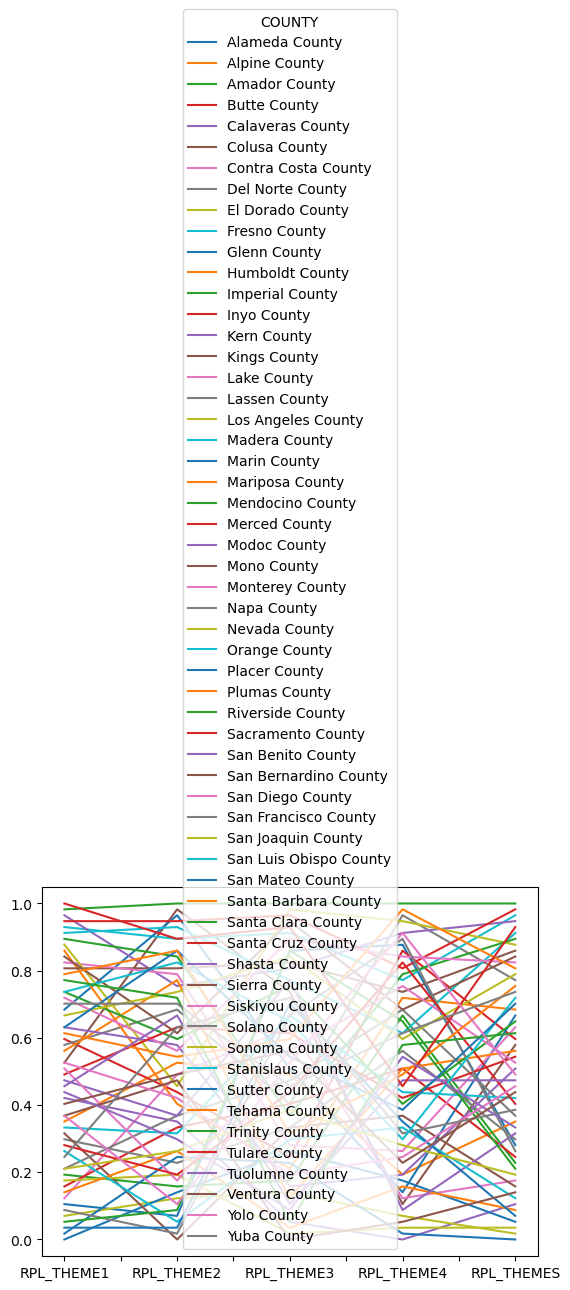

In [75]:
TRANSPOSED_df_SVI_TRIMED.plot()

In [ ]:
# Compare the plan effectiveness scores and social vulnerability scores. Do descriptive stats and regression in the future.